In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data collection and preproccesing

In [3]:
from google.colab import files
uploaded = files.upload()

Saving IMDb India Movies.csv to IMDb India Movies.csv


In [4]:
import pandas as pd
import io

# Assuming 'uploaded' is a dictionary containing the uploaded file
# You can specify the encoding as 'ISO-8859-1' (latin1)
df = pd.read_csv(io.BytesIO(uploaded['IMDb India Movies.csv']), encoding='ISO-8859-1')
print(df)


                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                             #Homecoming -2021.0   90 min   Drama, Musical   
3                                 #Yaaram -2019.0  110 min  Comedy, Romance   
4                       ...And Once Again -2010.0  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga -1988.0      NaN           Action   
15505                               Zulmi -1999.0  129 min    Action, Drama   
15506                           Zulmi Raj -2005.0      NaN           Action   
15507                       Zulmi Shikari -1988.0      NaN           Action   
15508                        Zulm-O-Sitam -1998.0  130 min    Action, Drama   

       Rating Votes            Director           A

In [5]:
df.head(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
#number of colmns and rows in dataset
print("Number of rows = ",df.shape[0])
print("Number of columns = ",df.shape[1])

Number of rows =  15509
Number of columns =  10


In [7]:
# Check for null values in each column
null_counts = df.isnull().sum()


In [8]:
#dropping the null values
df.dropna( inplace=True)

In [9]:
df.isnull().values.sum()


0

In [10]:
#checking for duplicate values
print("are there any duplicate values",df.duplicated().any())

are there any duplicate values False


In [11]:
df.shape

(5659, 10)

In [12]:
#stastical summry of the dataset
df.describe()

,Year,Rating
count,5659.000000,5659.000000
mean,-1996.247570,5.898533
std,19.741839,1.381165
min,-2021.000000,1.100000
25%,-2013.000000,5.000000
50%,-2002.000000,6.100000
75%,-1983.000000,6.900000
max,-1931.000000,10.000000


Explotory data analysis(EDA)

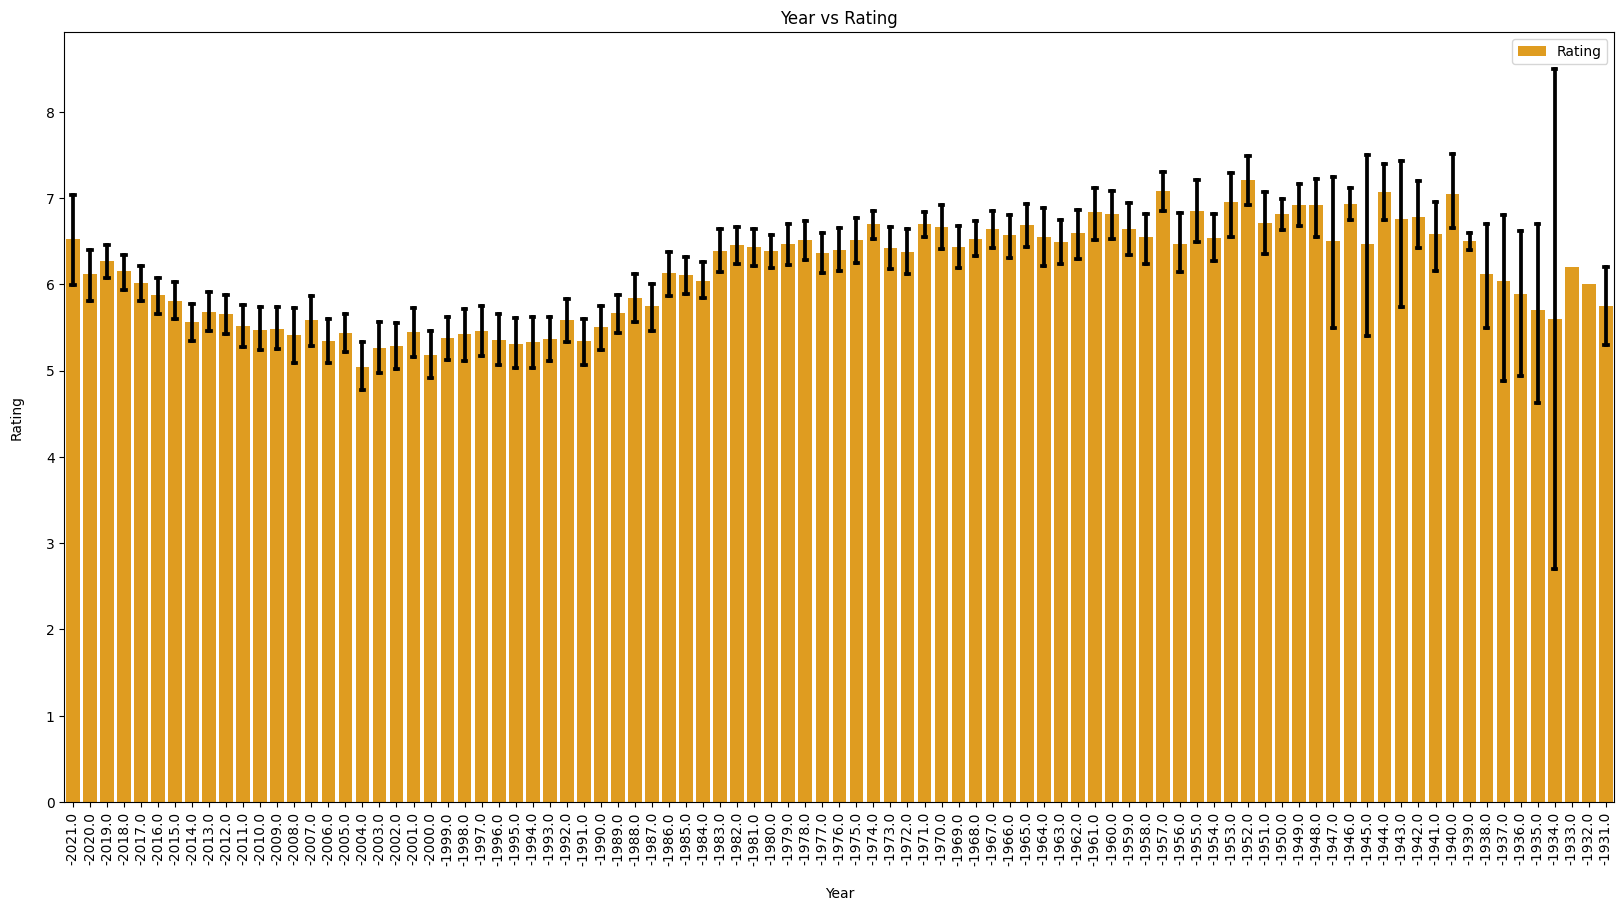

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of year vs. average rating
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='Year', y='Rating', color='orange', errcolor='black', capsize=0.2, label='Rating')
plt.title('Year vs Rating')
plt.xlabel('\nYear')  # Corrected from xlable to xlabel
plt.ylabel('Rating\n')  # Corrected from ylable to ylabel
plt.xticks(rotation=90)  # Corrected from ratation to rotation
plt.legend()
plt.show()


In [17]:
selected_columns = ['Duration', 'Rating']
subset_data = df[selected_columns]
correlation_duration_rating = subset_data.corr(numeric_only=True)


In [18]:
correlation_duration_rating

,Rating
Rating,1.0


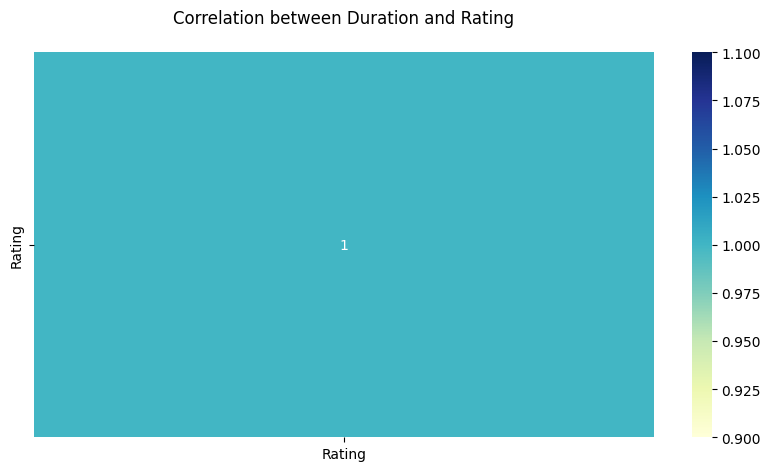

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of correlation_duration_rating using a heatmap
plt.figure(figsize=(10, 5))  # Corrected figsize
sns.heatmap(correlation_duration_rating, annot=True, cmap='YlGnBu')  # Corrected 'ylGnBu' to 'YlGnBu'
plt.title('Correlation between Duration and Rating\n')
plt.show()


In [20]:
# Top 10 directors by movie count
Director_movie_counts = df['Director'].value_counts().head(10)


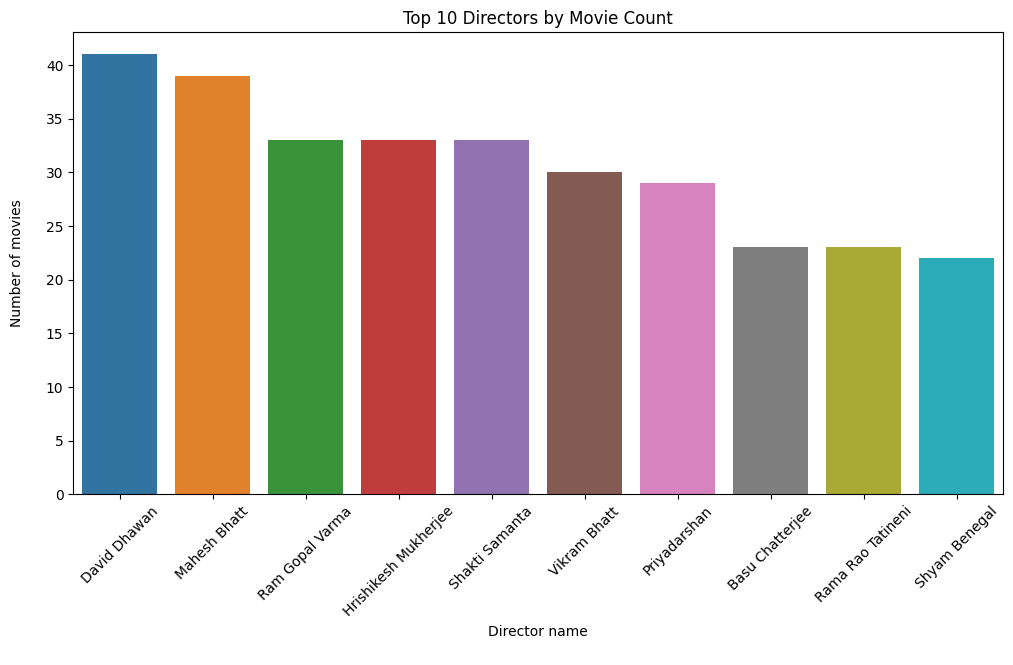

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of the top 10 directors by movie count
plt.figure(figsize=(12, 6))
sns.barplot(x=Director_movie_counts.index, y=Director_movie_counts.values)
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Director name\n')  # Corrected from xlable to xlabel
plt.ylabel('Number of movies\n')  # Corrected from ylable to ylabel
plt.xticks(rotation=45)
plt.show()


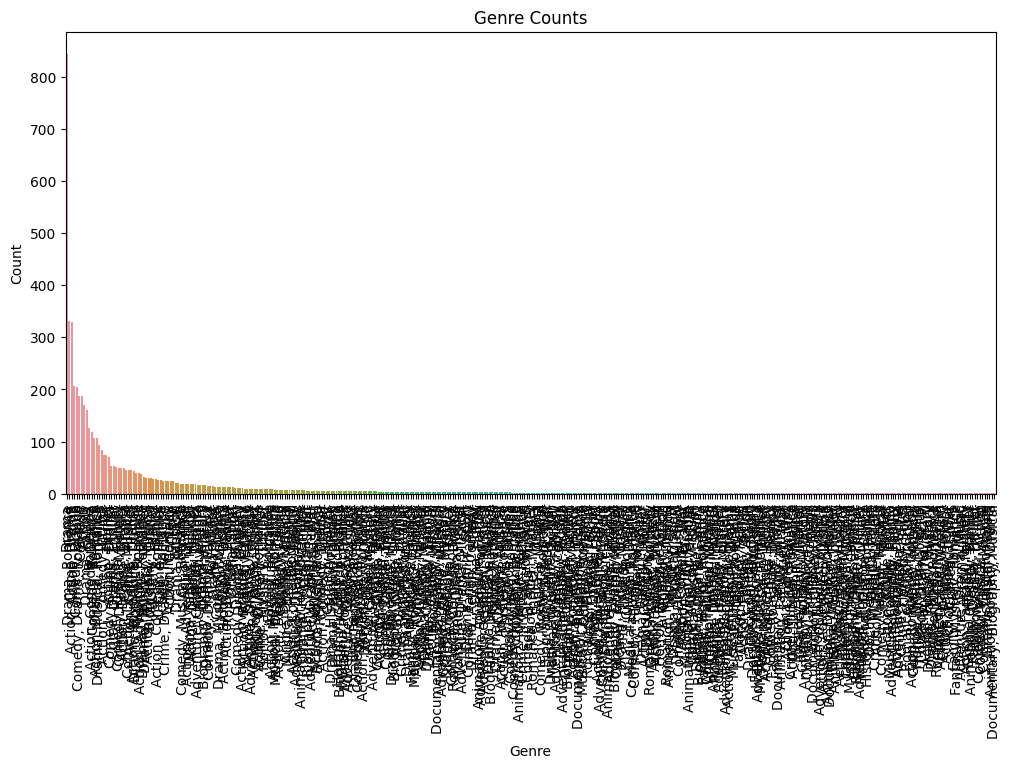

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate genre counts
Genre_counts = df['Genre'].value_counts()

# Create a bar plot to visualize genre counts
plt.figure(figsize=(12, 6))
sns.barplot(x=Genre_counts.index, y=Genre_counts.values)
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


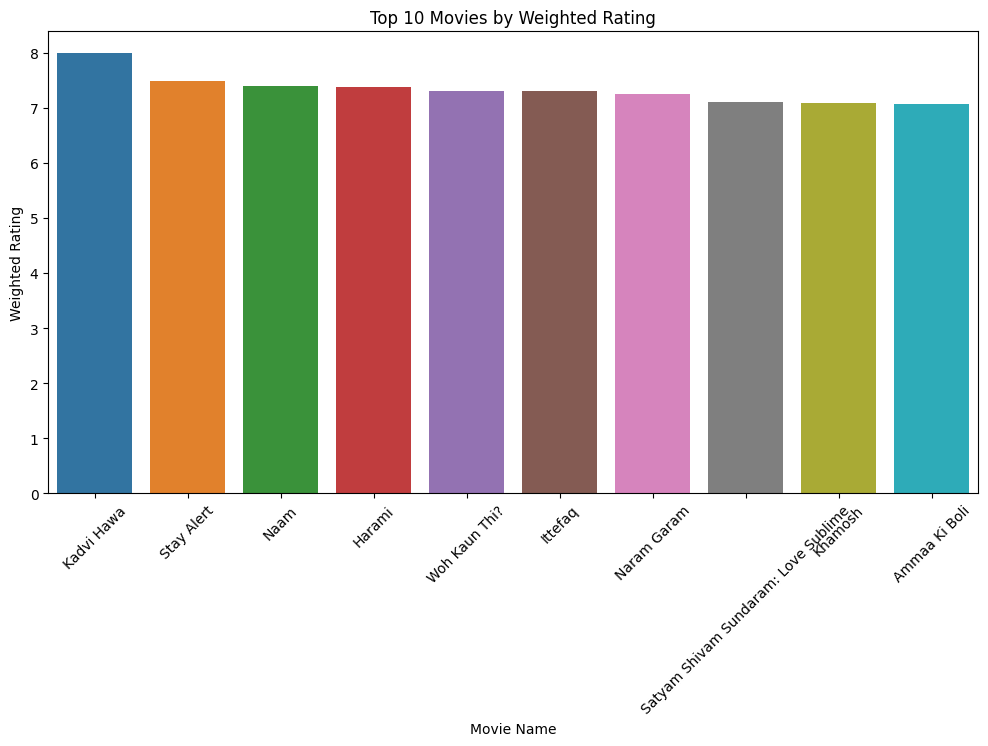

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Votes' column contains numeric values, you can convert it to float if needed
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Calculate Weighted Rating based on your criteria (e.g., using IMDb formula)
df['Weighted_Rating'] = (df['Rating'] * df['Votes']) / (df['Votes'].max())

# Sort the DataFrame by 'Weighted_Rating' and select the top 10 movies
top_rated_movies = df.sort_values(by='Weighted_Rating', ascending=False).head(10)

# Create a bar plot to visualize the top 10 movies by weighted rating
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Weighted_Rating', data=top_rated_movies)
plt.title('Top 10 Movies by Weighted Rating')
plt.xlabel('Movie Name')
plt.ylabel('Weighted Rating')
plt.xticks(rotation=45)
plt.show()



In [24]:
# Drop irrelevant features
df.drop(columns=['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)


In [25]:
df.head(2)

,Year,Duration,Rating,Votes,Weighted_Rating
1,-2019.0,109 min,7.0,8.0,0.056056
3,-2019.0,110 min,4.4,35.0,0.154154


Model selection and evaluation


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
#split features and target
X = df [['Year','Duration','Votes','Weighted_Rating']]
Y =  df['Rating']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [29]:
print(X_train.shape,X_test.shape)


(4527, 4) (1132, 4)


In [30]:
#creating the model
model = RandomForestRegressor()


In [31]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
import numpy as np  # If you're using NumPy for data manipulation

# Generate sample data (you should replace this with your actual data)
# For example, let's create two NumPy arrays for X_train and Y_train
X_train = np.array([[1], [2], [3], [4], [5]])  # Input features
Y_train = np.array([2, 4, 5, 4, 5])  # Corresponding target values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [32]:
# Import the necessary libraries
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
X_test = np.array([[6], [7], [8], [9], [10]])
Y_test = np.array([6, 7, 8, 9, 10])
# Now you can use X_test and Y_test to evaluate your model
Y_pred_test = model.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred_test)
R_Square = r2_score(Y_test, Y_pred_test)
print('MSE:', MSE)
print('R_Square:', R_Square)


MSE: 1.3200000000000007
R_Square: 0.33999999999999964


Building a Predictive System

In [33]:
df.tail(2)


,Year,Duration,Rating,Votes,Weighted_Rating
15505,-1999.0,129 min,4.5,655.0,2.950450
15508,-1998.0,130 min,6.2,20.0,0.124124


In [34]:
Year = int(input("Enter the release year of the movie: "))
Duration = int(input("Enter the duration of the movie (in minutes): "))
Votes = int(input("Enter the number of votes given for the movie: "))
Weighted_Rating = float(input("Enter the weighted rating of the movie: "))



Enter the release year of the movie: 1999
Enter the duration of the movie (in minutes): 129
Enter the number of votes given for the movie: 656
Enter the weighted rating of the movie: 0.000193


In [38]:
user_Input= {'Year': Year , 'Duration':Duration ,  'Votes':Votes,'Weighted_Rating ': Weighted_Rating }

In [39]:
import pandas as pd

# Assuming you have already collected user input in variables like Year, Duration, Votes, Weighted_Rating

# Create a DataFrame using user input
user_input = {
    'Year': [Year],
    'Duration': [Duration],
    'Votes': [Votes],
    'Weighted_Rating': [Weighted_Rating]
}

Movie_Rating = pd.DataFrame(user_input)


In [40]:
import pandas as pd

# Assuming your model was trained on the "Votes" feature
Votes_for_prediction = Movie_Rating['Votes'].values.reshape(-1, 1)

# Predict the movie rating based on the "Votes" feature
Movie_Rating_Prediction = model.predict(Votes_for_prediction)

# Print the prediction
print('\nThe prediction of movie rating based on the given input = ', Movie_Rating_Prediction[0])



The prediction of movie rating based on the given input =  395.79999999999995
